In [40]:
#Import Library
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from pandas_datareader import data as web
import os
import string
import requests
import nltk
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [41]:
Y = pd.read_csv("LabeledY.csv")
X = pd.read_csv("newscleaned2.csv")

In [42]:
Y.head()

,Unnamed: 0,Attributes,High,Low,Open,Close,Volume,Adj Close,Daily Growth,LabledY1,LabledY2
0,2,2016-09-26,2158.540039,2145.040039,2158.540039,2146.100098,3216170000,2146.100098,-0.005763,-1,-1
1,3,2016-09-27,2161.129883,2141.550049,2146.040039,2159.929932,3437770000,2159.929932,0.006472,1,1
2,4,2016-09-28,2172.399902,2151.790039,2161.850098,2171.370117,3891460000,2171.370117,0.004404,0,1
3,5,2016-09-29,2172.669922,2145.199951,2168.899902,2151.129883,4249220000,2151.129883,-0.008193,-1,-1
4,6,2016-09-30,2175.300049,2156.510010,2156.510010,2168.270020,4173340000,2168.270020,0.005453,0,1


In [43]:
from textblob import TextBlob

In [44]:
a = X['News_title'][0]
b = TextBlob(a).sentiment[0]
c = TextBlob(a).sentiment[1]

In [45]:
X_score = pd.DataFrame()

In [46]:
# Polarity Analysis for news_title
X_score['title_polarity'] = X['News_title'].apply(lambda x: TextBlob(x).sentiment[0])
X_score['title_subjectivity'] = X['News_title'].apply(lambda x: TextBlob(x).sentiment[1])

# Polarity Analysis for news_abstract
X_score['abs_polarity'] = X['News_abstract'].apply(lambda x: TextBlob(x).sentiment[0])
X_score['abs_subjectivity'] = X['News_abstract'].apply(lambda x: TextBlob(x).sentiment[1])

In [47]:
# Splite X to TrainX and TestX 70/30
# Splite Y to TrainY and TestY 70/30
Y = Y['LabledY2']
cut = int(0.7*X.shape[0])
Xtrain = X_score.iloc[0: cut]
Xtest = X_score.iloc[cut:]
Ytrain = Y.iloc[0: cut]
Ytest = Y.iloc[cut:]

In [86]:
XGBModel = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, \
                              silent=True, objective='binary:logistic', nthread=-1, \
                              reg_alpha=0, reg_lambda=1, \
                              base_score=0.5, missing=None)

fit=XGBModel.fit(Xtrain, Ytrain)

In [87]:
XGBModel.score(Xtrain,Ytrain)

0.8647887323943662

In [88]:
XGBModel.score(Xtest,Ytest)

0.40522875816993464

In [89]:
Y = XGBModel.predict(Xtest)

In [90]:
print((len((Ytest))))
print(len(XGBModel.predict_proba(Xtest)))

153
153


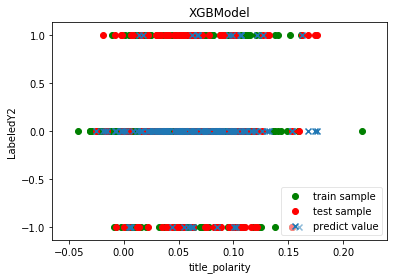

In [91]:
#visualize title_polarity
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Xtrain['title_polarity'],Ytrain,label="train sample",c='g')
ax.scatter(Xtest['title_polarity'],Ytest,label="test sample",c='r')
ax.scatter(Xtest['title_polarity'],Y,label="predict value", marker='x')
ax.set_xlabel("title_polarity")
ax.set_ylabel("LabeledY2")
ax.set_title("XGBModel")
ax.legend(framealpha=0.5)
plt.show()

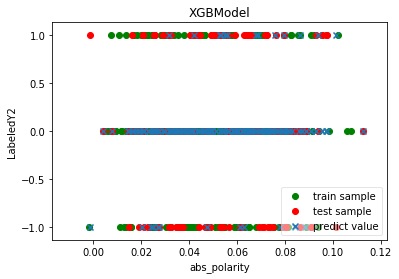

In [92]:
#visualize title_polarity
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Xtrain['abs_polarity'],Ytrain,label="train sample",c='g')
ax.scatter(Xtest['abs_polarity'],Ytest,label="test sample",c='r')
ax.scatter(Xtest['abs_polarity'],Y,label="predict value", marker='x')
ax.set_xlabel("abs_polarity")
ax.set_ylabel("LabeledY2")
ax.set_title("XGBModel")
ax.legend(framealpha=0.5)
plt.show()

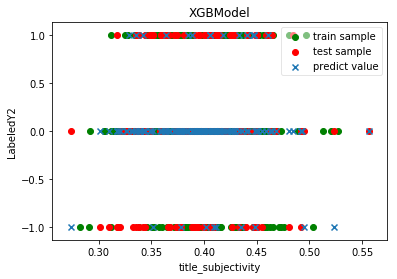

In [72]:
#visualize title_subjectivity
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Xtrain['title_subjectivity'],Ytrain,label="train sample",c='g')
ax.scatter(Xtest['title_subjectivity'],Ytest,label="test sample",c='r')
ax.scatter(Xtest['title_subjectivity'],Y,label="predict value", marker='x')
ax.set_xlabel("title_subjectivity")
ax.set_ylabel("LabeledY2")
ax.set_title("XGBModel")
ax.legend(framealpha=0.5)
plt.show()

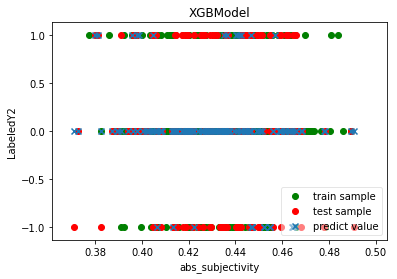

In [93]:
#visualize abs_subjectivity
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Xtrain['abs_subjectivity'],Ytrain,label="train sample",c='g')
ax.scatter(Xtest['abs_subjectivity'],Ytest,label="test sample",c='r')
ax.scatter(Xtest['abs_subjectivity'],Y,label="predict value", marker='x')
ax.set_xlabel("abs_subjectivity")
ax.set_ylabel("LabeledY2")
ax.set_title("XGBModel")
ax.legend(framealpha=0.5)
plt.show()